# Self-Organizing Map (SOM) for PheWAS Data

## Import Libraries

In this section, we will import the necessary libraries for the SOM analysis.


In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
import category_encoders as ce

## Load Data

In [650]:
# Load the data
data = pd.read_csv('Data/hla-phewas-catalog.csv')
data.head()

,snp,phewas_code,phewas_string,cases,controls,category_string,odds_ratio,p,l95,u95,gene_name,maf,a1,a2,chromosome,nchrobs
0,HLA_A_01,8.0,Intestinal infection,683,27384,infectious diseases,0.887,0.1654,0.749,1.051,A,0.1655,P,A,6,57678
1,HLA_A_0101,8.0,Intestinal infection,683,27384,infectious diseases,0.882,0.1470,0.745,1.045,A,0.1653,P,A,6,57678
2,HLA_A_02,8.0,Intestinal infection,683,27384,infectious diseases,0.928,0.3378,0.797,1.081,A,0.3025,P,A,6,57678
3,HLA_A_0201,8.0,Intestinal infection,683,27384,infectious diseases,0.919,0.2778,0.789,1.070,A,0.2906,P,A,6,57678
4,HLA_A_03,8.0,Intestinal infection,683,27384,infectious diseases,1.107,0.2359,0.936,1.310,A,0.1435,P,A,6,57678


In [651]:
# Check the shape of the data
data.shape

(240768, 16)

In [652]:
# Check the columns of the data
data.columns

Index(['snp', 'phewas_code', 'phewas_string', 'cases', 'controls',
       'category_string', 'odds_ratio', 'p', 'l95', 'u95', 'gene_name', 'maf',
       'a1', 'a2', 'chromosome', 'nchrobs'],
      dtype='object')

In [653]:
# Describe the data
data.describe()

,phewas_code,cases,controls,odds_ratio,p,l95,u95,maf,chromosome,nchrobs
count,240768.000000,240768.000000,240768.000000,240768.000000,2.407680e+05,240768.000000,240768.000000,240768.000000,240768.0,240768.0
mean,476.797734,605.363304,22841.290205,1.008905,4.986146e-01,0.639304,1.825813,0.080838,6.0,57678.0
std,214.739026,1021.123758,3965.917375,0.353697,2.933468e-01,0.263825,5.089146,0.082685,0.0,0.0
min,8.000000,40.000000,9354.000000,0.000000,4.613000e-54,0.000000,0.000000,0.010000,6.0,57678.0
25%,290.275000,104.000000,21062.000000,0.856000,2.444000e-01,0.478000,1.222000,0.022160,6.0,57678.0
50%,452.100000,264.500000,23598.000000,0.994000,4.958000e-01,0.683000,1.480000,0.044105,6.0,57678.0
75%,627.625000,672.250000,25503.250000,1.132000,7.521000e-01,0.829000,1.999000,0.123475,6.0,57678.0
max,994.200000,12197.000000,28737.000000,34.700000,1.000000e+00,18.940000,999.999000,0.453300,6.0,57678.0


In [654]:
# Check the data types of the columns
data.dtypes

snp                 object
phewas_code        float64
phewas_string       object
cases                int64
controls             int64
category_string     object
odds_ratio         float64
p                  float64
l95                float64
u95                float64
gene_name           object
maf                float64
a1                  object
a2                  object
chromosome           int64
nchrobs              int64
dtype: object

In [655]:
# Check the missing values in the data
data.isnull().sum()

snp                  0
phewas_code          0
phewas_string        0
cases                0
controls             0
category_string    176
odds_ratio           0
p                    0
l95                  0
u95                  0
gene_name            0
maf                  0
a1                   0
a2                   0
chromosome           0
nchrobs              0
dtype: int64

In [656]:
# Print the specific rows with missing values
data[data.isnull().any(axis=1)]

,snp,phewas_code,phewas_string,cases,controls,category_string,odds_ratio,p,l95,u95,gene_name,maf,a1,a2,chromosome,nchrobs
225280,HLA_A_01,797.2,Septic shock,451,27328,NaN,1.079,0.4575,0.883,1.317,A,0.16550,P,A,6,57678
225281,HLA_A_0101,797.2,Septic shock,451,27328,NaN,1.080,0.4487,0.885,1.319,A,0.16530,P,A,6,57678
225282,HLA_A_02,797.2,Septic shock,451,27328,NaN,0.972,0.7613,0.806,1.171,A,0.30250,P,A,6,57678
225283,HLA_A_0201,797.2,Septic shock,451,27328,NaN,1.011,0.9078,0.839,1.218,A,0.29060,P,A,6,57678
225284,HLA_A_03,797.2,Septic shock,451,27328,NaN,0.866,0.1961,0.697,1.077,A,0.14350,P,A,6,57678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225451,HLA_DRB1_14,797.2,Septic shock,451,27328,NaN,1.086,0.7154,0.698,1.690,DRB1,0.02207,P,A,6,57678
225452,HLA_DRB1_1401,797.2,Septic shock,451,27328,NaN,0.745,0.3377,0.408,1.360,DRB1,0.01644,P,A,6,57678
225453,HLA_DRB1_15,797.2,Septic shock,451,27328,NaN,0.847,0.1330,0.683,1.052,DRB1,0.14790,P,A,6,57678
225454,HLA_DRB1_1501,797.2,Septic shock,451,27328,NaN,0.837,0.1124,0.671,1.043,DRB1,0.14080,P,A,6,57678


In [657]:
# Check that all the septic shock categories are missing
data[data['phewas_string'] == 'Septic shock'].shape

(176, 16)

In [658]:
# Impute the missing values with infectious diseases as is closest to the missing values
data['category_string'] = data['category_string'].fillna('infectious diseases')

# Check the missing values in the data
data.isnull().sum()

snp                0
phewas_code        0
phewas_string      0
cases              0
controls           0
category_string    0
odds_ratio         0
p                  0
l95                0
u95                0
gene_name          0
maf                0
a1                 0
a2                 0
chromosome         0
nchrobs            0
dtype: int64

In [659]:
# Check for unique values in chromosome and nchrobs column
len(data['chromosome'].unique())

1

In [660]:
len(data['nchrobs'].unique())
# Drop chromosome and nchrobs columns as they are the same for all the rows (because the data is from the same chromosome)
data = data.drop(['chromosome', 'nchrobs'], axis=1)

In [661]:
# Print the gene names
data['gene_name'].unique()
# Add a new column to the data to indicate the class based on the gene name
data['gene_class'] = np.where(data['gene_name'].isin(['A', 'B', 'C']), 1, 2)

# Exploratory Data Analysis

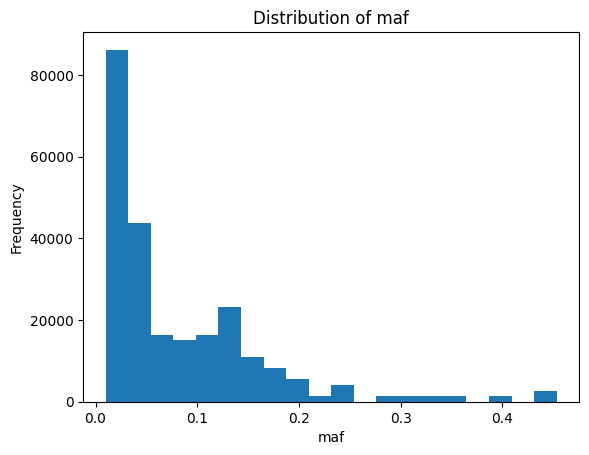

In [662]:
# Plot the distribution of the maf column
plt.hist(data['maf'], bins=20)
plt.xlabel('maf')
plt.ylabel('Frequency')
plt.title('Distribution of maf')
plt.show()

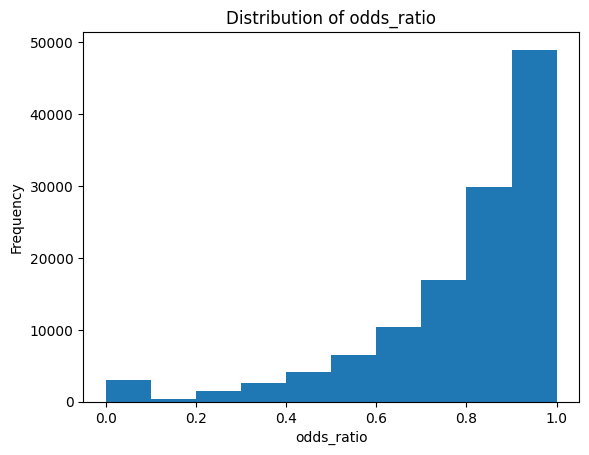

In [663]:
# Plot the distribution of the odds_ratio column
plt.hist(data['odds_ratio'], range=(0, 1))
plt.xlabel('odds_ratio')
plt.ylabel('Frequency')
plt.title('Distribution of odds_ratio')
plt.show()

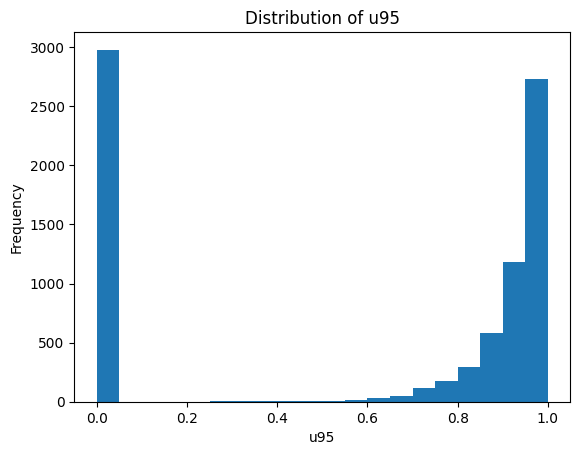

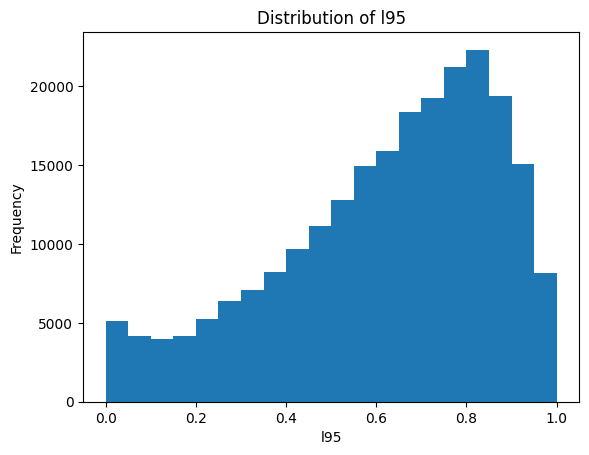

In [664]:
# Plot the distribution of the u95 and l95 columns
plt.hist(data['u95'], bins=20, range=(0, 1))
plt.xlabel('u95')
plt.ylabel('Frequency')
plt.title('Distribution of u95')
plt.show()

plt.hist(data['l95'], bins=20, range=(0, 1))
plt.xlabel('l95')
plt.ylabel('Frequency')
plt.title('Distribution of l95')
plt.show()

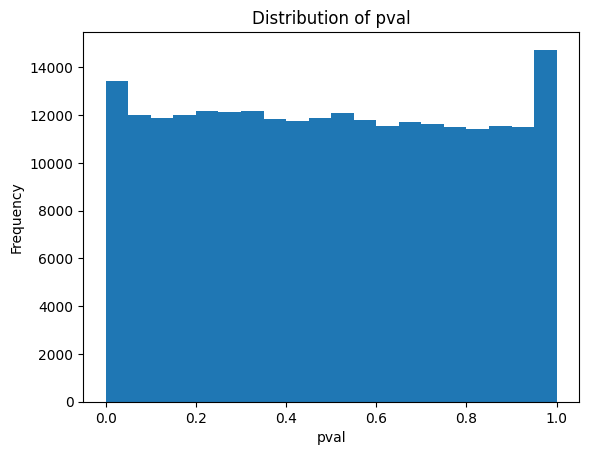

In [665]:
# Plot the distribution of the pval column
plt.hist(data['p'], bins=20)
plt.xlabel('pval')
plt.ylabel('Frequency')
plt.title('Distribution of pval')
plt.show()


# Data Preprocessing

In [666]:
# Display the first few rows of the data
data.head()

,snp,phewas_code,phewas_string,cases,controls,category_string,odds_ratio,p,l95,u95,gene_name,maf,a1,a2,gene_class
0,HLA_A_01,8.0,Intestinal infection,683,27384,infectious diseases,0.887,0.1654,0.749,1.051,A,0.1655,P,A,1
1,HLA_A_0101,8.0,Intestinal infection,683,27384,infectious diseases,0.882,0.1470,0.745,1.045,A,0.1653,P,A,1
2,HLA_A_02,8.0,Intestinal infection,683,27384,infectious diseases,0.928,0.3378,0.797,1.081,A,0.3025,P,A,1
3,HLA_A_0201,8.0,Intestinal infection,683,27384,infectious diseases,0.919,0.2778,0.789,1.070,A,0.2906,P,A,1
4,HLA_A_03,8.0,Intestinal infection,683,27384,infectious diseases,1.107,0.2359,0.936,1.310,A,0.1435,P,A,1


In [667]:
# Copy the data to a new variable to preserve the original data
cleaned_data = data.copy()

# Drop unnecessary columns - phewas_string, category_string
cleaned_data = cleaned_data.drop(['phewas_string', 'category_string'], axis=1)

# Display the first few rows of the cleaned data
cleaned_data.head()

,snp,phewas_code,cases,controls,odds_ratio,p,l95,u95,gene_name,maf,a1,a2,gene_class
0,HLA_A_01,8.0,683,27384,0.887,0.1654,0.749,1.051,A,0.1655,P,A,1
1,HLA_A_0101,8.0,683,27384,0.882,0.1470,0.745,1.045,A,0.1653,P,A,1
2,HLA_A_02,8.0,683,27384,0.928,0.3378,0.797,1.081,A,0.3025,P,A,1
3,HLA_A_0201,8.0,683,27384,0.919,0.2778,0.789,1.070,A,0.2906,P,A,1
4,HLA_A_03,8.0,683,27384,1.107,0.2359,0.936,1.310,A,0.1435,P,A,1


In [668]:
# Concatenate a1 and a2 columns to create a new column a1_a2
cleaned_data['a1_a2'] = cleaned_data['a1'] + '_' + cleaned_data['a2']

# Drop the a1 and a2 columns
cleaned_data = cleaned_data.drop(['a1', 'a2'], axis=1)

# Display the first few rows of the cleaned data
cleaned_data.head()

,snp,phewas_code,cases,controls,odds_ratio,p,l95,u95,gene_name,maf,gene_class,a1_a2
0,HLA_A_01,8.0,683,27384,0.887,0.1654,0.749,1.051,A,0.1655,1,P_A
1,HLA_A_0101,8.0,683,27384,0.882,0.1470,0.745,1.045,A,0.1653,1,P_A
2,HLA_A_02,8.0,683,27384,0.928,0.3378,0.797,1.081,A,0.3025,1,P_A
3,HLA_A_0201,8.0,683,27384,0.919,0.2778,0.789,1.070,A,0.2906,1,P_A
4,HLA_A_03,8.0,683,27384,1.107,0.2359,0.936,1.310,A,0.1435,1,P_A


In [669]:
# Encode the a1_a2 column using one-hot encoding
encoder = ce.OneHotEncoder(cols=['a1_a2'], use_cat_names=True)

# Fit and transform the data
cleaned_data = encoder.fit_transform(cleaned_data)

# Display the first few rows of the cleaned data
cleaned_data.head()

,snp,phewas_code,cases,controls,odds_ratio,p,l95,u95,gene_name,maf,gene_class,a1_a2_P_A,a1_a2_A_P
0,HLA_A_01,8.0,683,27384,0.887,0.1654,0.749,1.051,A,0.1655,1,1,0
1,HLA_A_0101,8.0,683,27384,0.882,0.1470,0.745,1.045,A,0.1653,1,1,0
2,HLA_A_02,8.0,683,27384,0.928,0.3378,0.797,1.081,A,0.3025,1,1,0
3,HLA_A_0201,8.0,683,27384,0.919,0.2778,0.789,1.070,A,0.2906,1,1,0
4,HLA_A_03,8.0,683,27384,1.107,0.2359,0.936,1.310,A,0.1435,1,1,0


In [670]:
# Check the number of unique values in the snp column
len(cleaned_data['snp'].unique())

# Defines a regex pattern to extract the serotype and subtype from the snp column
pattern = r'HLA_([A-Z0-9]+)_(\d{2})(\d{2})?$'

# Extract the serotype and subtype from the snp column
cleaned_data[['name','serotype', 'subtype']] = cleaned_data['snp'].str.extract(pattern)

# Drop the snp column and redundant name column
cleaned_data = cleaned_data.drop(['snp', 'name'], axis=1)

# Fill missing values in subtype column with '00' as an indicator of no deeper specificity
cleaned_data['subtype'] = cleaned_data['subtype'].fillna('00')

# Reorder columns for better readability
columns = ['gene_class', 'gene_name', 'serotype', 'subtype', 'phewas_code', 'cases', 'controls', 'odds_ratio', 'p', 'l95', 'u95',
           'maf', 'a1_a2_P_A', 'a1_a2_A_P'
          ]
cleaned_data = cleaned_data[columns]

# Display the first few rows of the cleaned data
cleaned_data.head()

,gene_class,gene_name,serotype,subtype,phewas_code,cases,controls,odds_ratio,p,l95,u95,maf,a1_a2_P_A,a1_a2_A_P
0,1,A,01,00,8.0,683,27384,0.887,0.1654,0.749,1.051,0.1655,1,0
1,1,A,01,01,8.0,683,27384,0.882,0.1470,0.745,1.045,0.1653,1,0
2,1,A,02,00,8.0,683,27384,0.928,0.3378,0.797,1.081,0.3025,1,0
3,1,A,02,01,8.0,683,27384,0.919,0.2778,0.789,1.070,0.2906,1,0
4,1,A,03,00,8.0,683,27384,1.107,0.2359,0.936,1.310,0.1435,1,0


In [671]:
# Get count of unique values in each column
cleaned_data.nunique()

gene_class         2
gene_name          8
serotype          38
subtype            7
phewas_code     1368
cases            720
controls         198
odds_ratio      2966
p              19748
l95             1669
u95             6571
maf              151
a1_a2_P_A          2
a1_a2_A_P          2
dtype: int64

In [672]:
# One Hot Encode gene_name, serotype and subtype columns
encoder = ce.OneHotEncoder(cols=['gene_name', 'serotype', 'subtype'], use_cat_names=True)

# Fit and transform the data
cleaned_data = encoder.fit_transform(cleaned_data)

# Display the first few rows of the cleaned data
cleaned_data.head()

,gene_class,gene_name_A,gene_name_B,gene_name_C,gene_name_DPA1,gene_name_DPB1,gene_name_DQA1,gene_name_DQB1,gene_name_DRB1,serotype_01,...,phewas_code,cases,controls,odds_ratio,p,l95,u95,maf,a1_a2_P_A,a1_a2_A_P
0,1,1,0,0,0,0,0,0,0,1,...,8.0,683,27384,0.887,0.1654,0.749,1.051,0.1655,1,0
1,1,1,0,0,0,0,0,0,0,1,...,8.0,683,27384,0.882,0.1470,0.745,1.045,0.1653,1,0
2,1,1,0,0,0,0,0,0,0,0,...,8.0,683,27384,0.928,0.3378,0.797,1.081,0.3025,1,0
3,1,1,0,0,0,0,0,0,0,0,...,8.0,683,27384,0.919,0.2778,0.789,1.070,0.2906,1,0
4,1,1,0,0,0,0,0,0,0,0,...,8.0,683,27384,1.107,0.2359,0.936,1.310,0.1435,1,0


In [673]:
# Preserve the phewas_code column for binary encoding
cleaned_data['phewas_code'] = cleaned_data['phewas_code'].astype(str)
phewas_codes = cleaned_data['phewas_code']

# Binary encode the phewas_code column
encoder = ce.BinaryEncoder(cols=['phewas_code'])

# Fit and transform the data
cleaned_data = encoder.fit_transform(cleaned_data)

# Display the first few rows of the cleaned data
cleaned_data.head()

,gene_class,gene_name_A,gene_name_B,gene_name_C,gene_name_DPA1,gene_name_DPB1,gene_name_DQA1,gene_name_DQB1,gene_name_DRB1,serotype_01,...,phewas_code_10,cases,controls,odds_ratio,p,l95,u95,maf,a1_a2_P_A,a1_a2_A_P
0,1,1,0,0,0,0,0,0,0,1,...,1,683,27384,0.887,0.1654,0.749,1.051,0.1655,1,0
1,1,1,0,0,0,0,0,0,0,1,...,1,683,27384,0.882,0.1470,0.745,1.045,0.1653,1,0
2,1,1,0,0,0,0,0,0,0,0,...,1,683,27384,0.928,0.3378,0.797,1.081,0.3025,1,0
3,1,1,0,0,0,0,0,0,0,0,...,1,683,27384,0.919,0.2778,0.789,1.070,0.2906,1,0
4,1,1,0,0,0,0,0,0,0,0,...,1,683,27384,1.107,0.2359,0.936,1.310,0.1435,1,0


In [674]:
from sklearn.preprocessing import MinMaxScaler
# Normalise numerical columns
numerical_columns = ['cases', 'controls', 'odds_ratio', 'p', 'l95', 'u95', 'maf']

scaler = MinMaxScaler()
cleaned_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])

# Display the first few rows of the cleaned data
cleaned_data.head()

,gene_class,gene_name_A,gene_name_B,gene_name_C,gene_name_DPA1,gene_name_DPB1,gene_name_DQA1,gene_name_DQB1,gene_name_DRB1,serotype_01,...,phewas_code_10,cases,controls,odds_ratio,p,l95,u95,maf,a1_a2_P_A,a1_a2_A_P
0,1,1,0,0,0,0,0,0,0,1,...,1,0.052891,0.930197,0.025562,0.1654,0.039546,0.001051,0.350778,1,0
1,1,1,0,0,0,0,0,0,0,1,...,1,0.052891,0.930197,0.025418,0.1470,0.039335,0.001045,0.350327,1,0
2,1,1,0,0,0,0,0,0,0,0,...,1,0.052891,0.930197,0.026744,0.3378,0.042080,0.001081,0.659824,1,0
3,1,1,0,0,0,0,0,0,0,0,...,1,0.052891,0.930197,0.026484,0.2778,0.041658,0.001070,0.632980,1,0
4,1,1,0,0,0,0,0,0,0,0,...,1,0.052891,0.930197,0.031902,0.2359,0.049419,0.001310,0.301150,1,0


# Train the Self-Organizing Map (SOM)

In [675]:
# Get the input features
X = cleaned_data.values

# Define the dimensions of the SOM
som = MiniSom(x=20, y=20, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the weights
som.random_weights_init(X)

# Train the SOM
som.train_random(data=X, num_iteration=5000)

# Print a message to indicate that the training is complete
print('Training is complete')

Training is complete


# Visualize the SOM